In [ ]:
"""Шаг 2. Git."""

# 1. Про Git

Git - система контроля версий файлов

Функции:
- создание репозиториев - хранилищ файлов
- отслеживание изменений в файлах в локальном репо и серверном репо
- склейка (сливание) изменений из 1 ветки в 2 ветку

Команды основные:
- `git init` создание репо
- `git clone` взять репо из внешнего в локальный
- `git add` добавить файл для будущего коммита (в индекс / staging area)
- `git commit` добавляет файлы для коммита в локальный commit
- `git push` добавляет из локального commit'а во внешний репо
- `git pull` применяет изменения из внешнего репо в локальный репо
- `git log` просмотр журнала коммитов

# 2. Пройти курс основы командной строки на Hexlet
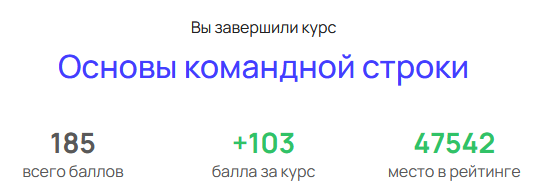

# 3. Пройти курс Git на Hexlet
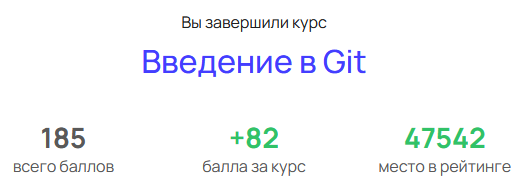